# Visual Language Maps (VLMaps) for Robot Navigation

## Project Overview

This notebook presents a **reimplementation of the Visual Language Maps (VLMaps) framework**
for language-conditioned robot navigation, as introduced by Huang et al. (ICRA 2023).
The objective of this work is to construct a unified spatial representation that fuses
**geometric structure** with **open-vocabulary semantic understanding**, enabling robots
to interpret and execute complex natural language navigation commands.

Unlike classical SLAM-based navigation systems that operate purely on geometry, VLMaps
encode **visual-language embeddings directly into a spatial map**, allowing robots to
ground free-form language queries such as *“go to the chair next to the table”* or
*“navigate between the sofa and the cabinet”*.

This implementation follows the methodology described in the original paper and evaluates
its effectiveness on simulated indoor environments using RGB-D data.

---

## Motivation

Robotic navigation in unstructured environments requires both:
- **spatial reasoning** (where am I? where are obstacles?), and
- **semantic understanding** (what objects exist and how are they described in language).

Traditional navigation pipelines excel at geometry but lack semantic flexibility, while
modern vision–language models excel at semantic grounding but lack persistent spatial memory.
VLMaps address this gap by introducing a **persistent, spatially grounded, open-vocabulary
map** that unifies both capabilities.

This enables:
- zero-shot generalization to unseen objects,
- interpretation of relational language instructions,
- and adaptability across different robot embodiments.

---

## High-Level Pipeline

The VLMaps pipeline implemented in this notebook consists of the following stages:

1. **RGB-D Data Acquisition**
   - The agent collects RGB images, depth maps, and pose information while exploring
     an indoor environment.

2. **Visual-Language Feature Extraction**
   - Each RGB observation is encoded into a high-dimensional semantic embedding
     using a vision–language model operating in a shared image–text embedding space.

3. **3D Reconstruction and Back-Projection**
   - Depth pixels are back-projected into 3D space using camera intrinsics and
     transformed into a global coordinate frame using the agent pose.

4. **VLMap Construction**
   - Visual-language embeddings are projected onto a 2D top-down grid map.
   - Multiple embeddings falling into the same grid cell are aggregated to produce
     a robust semantic representation.

5. **Language Querying and Landmark Identification**
   - Natural language queries are encoded and matched against the VLMap using
     semantic similarity.
   - High-scoring regions correspond to language-referenced landmarks.

6. **Navigation and Execution**
   - Identified goal regions are used to generate navigation plans and action
     sequences for the robot.

---

## Mathematical Formulation

Let an RGB-D observation at time step $t$ be defined as:

$$
(I_t, D_t, T_t)
$$

where $I_t$ is the RGB image, $D_t$ is the depth image, and $T_t$ is the
camera-to-world transformation.

### Visual-Language Encoding

Each RGB image is encoded using a visual encoder:

$$
\mathbf{f}_t = E_v(I_t)
$$

A language query $q$ is encoded using a text encoder:

$$
\mathbf{l}_q = E_l(q)
$$

Both embeddings lie in a shared semantic space.

### Back-Projection to 3D

For a pixel $u = (u, v)$, the 3D point in the camera frame is computed as:

$$
\mathbf{P}_k = D(u)\, K^{-1} \tilde{u}
$$

where $K$ is the camera intrinsic matrix and $\tilde{u}$ is the homogeneous pixel
coordinate.

The point is transformed into the world frame using:

$$
\mathbf{P}_W = T_{Wk}\, \mathbf{P}_k
$$

### VLMap Representation

The environment is discretized into a 2D grid map $\mathcal{M} \in \mathbb{R}^{H \times W \times C}$,
where each cell stores an aggregated semantic embedding:

$$
\mathcal{M}(x, y) = \frac{1}{n} \sum_{i=1}^{n} \mathbf{f}_i
$$

### Semantic Matching
To localize a language query in the map, cosine similarity is computed:

$$
s(x, y) = \cos(\mathcal{M}(x, y), \mathbf{l}_q)
$$

Cells with the highest similarity scores correspond to language-grounded targets.

---

## Open-Vocabulary Navigation

Because VLMaps operate in a shared image–language embedding space, the system supports
**open-vocabulary landmark indexing** without requiring predefined object categories.
This enables robots to follow complex, multi-step instructions and reason about spatial
relationships between objects.

In addition, language instructions can be decomposed into navigation primitives and
executed sequentially, enabling zero-shot navigation behavior.

---

## Results Summary

The implementation demonstrates that:
- visual-language embeddings can be reliably fused into a spatial map,
- landmarks can be identified using free-form language queries,
- and navigation actions can be generated based on semantic reasoning.

The resulting VLMaps enable robust object-goal navigation and illustrate the potential
of combining vision–language models with spatial mapping for intuitive robot control.

---

## Notebook Structure

The remainder of this notebook is organized as follows:

1. Dataset preparation and environment setup
2. VLMap creation and visualization
3. Landmark identification using language queries
4. Navigation experiments and action generation
5. Discussion and observations

## Citation

This work is based on the following paper:

**Visual Language Maps for Robot Navigation**  
Chenguang Huang, Oier Mees, Andy Zeng, Wolfram Burgard  
*Proceedings of the IEEE International Conference on Robotics and Automation (ICRA), 2023*  
London, UK  

Project website: https://vlmaps.github.io/

```bibtex
@inproceedings{huang23vlmaps,
  title     = {Visual Language Maps for Robot Navigation},
  author    = {Chenguang Huang and Oier Mees and Andy Zeng and Wolfram Burgard},
  booktitle = {Proceedings of the IEEE International Conference on Robotics and Automation (ICRA)},
  year      = {2023},
  address   = {London, UK}
}
```

## Dataset Preparation and Repository Setup

This cell prepares the workspace by downloading the required dataset and setting up
the codebase used for Visual Language Map (VLMap) generation.

First, a preprocessed RGB-D dataset corresponding to an indoor scene is downloaded.
This dataset contains:
- RGB images
- depth maps
- camera pose information

These components are required to construct VLMaps by back-projecting visual-language
features into a spatial map.

Next, the official VLMaps implementation repository is cloned. This repository provides
the core utilities for:
- visual-language feature extraction,
- VLMap construction,
- landmark indexing,
- and navigation-related processing.

After cloning, the working directory is switched to the repository root to access
the provided scripts, configuration files, and utilities used throughout the
subsequent stages of the pipeline.

At the end of this step, the environment contains:
- the downloaded RGB-D dataset,
- the VLMaps codebase,
- and all necessary files to begin VLMap creation.

In [ ]:
%cd /content/
!gdown 1n81Lm8ywg5xTp8uwWEtzXvmDHB_9Sboi
!pip install tqdm
!unzip -o jh4fc5c5qoQ_1.zip | tqdm --desc extracted --unit files --unit_scale --total `unzip -l jh4fc5c5qoQ_1.zip | tail -n 1 | xargs echo -n | cut -d' ' -f2` > /dev/null
!git clone https://github.com/Aman-Chandak/vlmaps.git
!git checkout master
%cd vlmaps
!ls

/content
Downloading...
From (original): https://drive.google.com/uc?id=1n81Lm8ywg5xTp8uwWEtzXvmDHB_9Sboi
From (redirected): https://drive.google.com/uc?id=1n81Lm8ywg5xTp8uwWEtzXvmDHB_9Sboi&confirm=t&uuid=7d1f11fc-c016-49fe-b7c0-cb2c3e184e5e
To: /content/jh4fc5c5qoQ_1.zip
100% 1.54G/1.54G [00:10<00:00, 144MB/s]
extracted: 2.02kfiles [01:05, 30.7files/s]
Cloning into 'vlmaps'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 40 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 29.39 KiB | 4.20 MiB/s, done.
Resolving deltas: 100% (7/7), done.
fatal: not a git repository (or any of the parent directories): .git
/content/vlmaps
examples  install.bash	lseg  pyproject.toml  requirements-dev.txt  requirements.txt  utils


## Dependency Installation and Simulation Stack Setup

This cell installs all required dependencies for running the Visual Language Maps
(VLMaps) pipeline end-to-end.

The implementation relies on a combination of:
- deep learning frameworks for visual-language embedding,
- computer vision utilities for image and depth processing,
- mapping and visualization libraries,
- and a simulation environment for embodied navigation.

Key components installed in this step include:
- **CLIP** for joint vision–language embeddings,
- **LSeg / encoding utilities** for semantic feature extraction,
- **PyTorch Lightning** for structured model execution,
- **OpenCV and ImageIO** for image handling,
- **Habitat-Sim and Habitat-Lab** for RGB-D simulation and navigation experiments.

The Habitat simulation stack is installed from source and pinned to a specific
commit to ensure compatibility with the VLMaps implementation. This setup enables
the agent to access RGB-D observations, camera poses, and environment metadata
required for VLMap construction.

At the end of this step, the environment is fully configured to:
- process RGB-D data,
- generate visual-language embeddings,
- construct VLMaps,
- and perform language-conditioned navigation experiments.

In [ ]:
# install dependencies
!pip install git+https://github.com/openai/CLIP.git
!pip install torch-encoding
!pip install ipython
!pip install pytorch-lightning
!pip install opencv-python
!pip install imageio
!pip install ftfy regex tqdm
!pip install altair
!pip install --upgrade protobuf
!pip install timm
!pip install matplotlib
!pip install wandb
!pip install h5py

# install habitat
!pip install cmake==3.14.4
!pip install tensorflow-gpu==2.9.1
!conda install habitat-sim -c conda-forge -c aihabitat
%cd ~
!git clone https://github.com/facebookresearch/habitat-lab.git
!pip install gym==0.22.0
%cd habitat-lab
!git checkout bfba72f47800819d858a6859b14cfa26122c2762
!python setup.py develop --all

!pip install openai==0.8.0
!pip install grad-cam

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-hheciqpn
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-hheciqpn
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.3 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=e7ed1c19e56a93012b05292a971c512c3ae885c8e9a840203ff20bd145c49813
  Stored in directory: /tmp/pip-ephem-wheel-cache-caju5v8u/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.2/126.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 

/bin/bash: line 1: conda: command not found
/root
Cloning into 'habitat-lab'...
remote: Enumerating objects: 65024, done.
remote: Counting objects: 100% (992/992), done.
remote: Compressing objects: 100% (429/429), done.
remote: Total 65024 (delta 645), reused 844 (delta 554), pack-reused 64032 (from 1)
Receiving objects: 100% (65024/65024), 254.88 MiB | 38.40 MiB/s, done.
Resolving deltas: 100% (49381/49381), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 14.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.22.0-py3-none-any.whl size=708390 sha256=56439d41fc2114d3df4b8110e1f7060a72f8c8fe27a807fbcf9dad0505f90fd8
  Stored in directory: /root/.cache/pip/wheels/42/e8/e8/6dfbc92a1dcd76c1a5e2bb982750fd6b7e792239f46039e6b1
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalli

## Helper Functions for RGB-D Video Generation and Visualization

This cell defines a set of helper functions used to **process, visualize, and export
RGB-D observations** collected from the simulated environment.

During VLMap construction and navigation experiments, the agent generates:
- sequences of RGB images, and
- corresponding depth maps

These modalities are useful not only for map generation, but also for **qualitative
inspection of agent behavior**, scene structure, and depth perception.

The utilities defined here support the following functionality:

- **Depth Loading**  
  Load depth data stored in NumPy format for further processing and visualization.

- **Efficient Video Writing**  
  Create video writers that automatically select between GPU-accelerated or
  CPU-based encoding depending on availability. This allows fast generation of
  MP4 videos from long RGB-D sequences.

- **RGB and Depth Video Creation**  
  Convert ordered RGB frames and depth maps into synchronized video streams.
  Depth values are normalized and color-mapped to improve interpretability.

- **Inline Video Display**  
  Render generated videos directly within the notebook for quick inspection,
  enabling side-by-side visualization of RGB and depth observations.

These visualization utilities are used throughout the notebook to:
- verify dataset integrity,
- inspect environment coverage during exploration,
- and qualitatively analyze navigation and mapping results.

In [ ]:
# @title Helper functions for video creation and display. This would combine the RGB images and heat maps sequentially which was created using Matterport3D and Habitat simulator.
import sys
import os
import imageio
import numpy as np
import cv2
import tqdm
from IPython.display import HTML
from base64 import b64encode

if "google.colab" in sys.modules:
    os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/bin/ffmpeg"

# @markdown if the colab instance doesn't have GPU, untick the following checkbox
has_gpu = True # @param {type: "boolean"}
codec = "h264"
if has_gpu:
  codec = "h264_nvenc"

def load_depth(depth_filepath):
    with open(depth_filepath, 'rb') as f:
        depth = np.load(f)
    return depth



def get_fast_video_writer(video_file: str, fps: int = 60):
    if (
        "google.colab" in sys.modules
        and os.path.splitext(video_file)[-1] == ".mp4"
        and os.environ.get("IMAGEIO_FFMPEG_EXE") == "/usr/bin/ffmpeg"
    ):
        # USE GPU Accelerated Hardware Encoding
        writer = imageio.get_writer(
            video_file,
            fps=fps,
            codec=codec,
            mode="I",
            bitrate="1000k",
            format="FFMPEG",
            ffmpeg_log_level="info",
            quality=10,
            output_params=["-minrate", "500k", "-maxrate", "5000k"],
        )
    else:
        # Use software encoding
        writer = imageio.get_writer(video_file, fps=fps)
    return writer

def create_video(data_dir: str, output_dir: str, fps: int = 30):

    rgb_dir = os.path.join(data_dir, "rgb")
    depth_dir = os.path.join(data_dir, "depth")
    rgb_out_path = os.path.join(output_dir, "rgb.mp4")
    depth_out_path = os.path.join(output_dir, "depth.mp4")
    rgb_writer = get_fast_video_writer(rgb_out_path, fps=fps)
    depth_writer = get_fast_video_writer(depth_out_path, fps=fps)

    rgb_list = sorted(os.listdir(rgb_dir), key=lambda x: int(
        x.split("_")[-1].split(".")[0]))
    depth_list = sorted(os.listdir(depth_dir), key=lambda x: int(
        x.split("_")[-1].split(".")[0]))

    rgb_list = [os.path.join(rgb_dir, x) for x in rgb_list]
    depth_list = [os.path.join(depth_dir, x) for x in depth_list]
    pbar = tqdm.tqdm(total=len(rgb_list), position=0, leave=True)
    for i, (rgb_path, depth_path) in enumerate(zip(rgb_list, depth_list)):
        bgr = cv2.imread(rgb_path)
        rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

        depth = load_depth(depth_path)
        depth_vis = (depth / 10 * 255).astype(np.uint8)

        depth_color = cv2.applyColorMap(depth_vis, cv2.COLORMAP_JET)

        rgb_writer.append_data(rgb)
        depth_writer.append_data(depth_color)
        pbar.update(1)
    rgb_writer.close()
    depth_writer.close()

def show_video(video_path, video_width = 1080):

    video_file = open(video_path, "r+b").read()

    video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
    return HTML(f"""<video width={video_width} autoplay controls><source src="{video_url}"></video>""")

def show_videos(video_paths, video_width = 1080):
    html = ""
    for video_path in video_paths:
        video_file = open(video_path, "r+b").read()

        video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
        html += f"""<video width={video_width} autoplay controls><source src="{video_url}"></video>
                 """
    return HTML(html)



## Generating RGB and Depth Videos from the Dataset

This cell uses the previously defined helper functions to generate video
visualizations from the RGB-D dataset.

The function processes:
- the sequence of RGB images, and
- the corresponding depth maps

stored in the dataset directory, and converts them into two synchronized
MP4 videos:
- an RGB video showing the visual appearance of the environment, and
- a depth video showing the scene structure encoded as color-mapped depth values.

These videos provide a qualitative overview of the environment and serve as a
useful tool for verifying the integrity of the dataset before proceeding with
VLMap construction and navigation experiments.

In [ ]:
create_video("/content/jh4fc5c5qoQ_1", "/content/", fps=30)

100%|██████████| 500/500 [00:23<00:00, 21.01it/s]


## Visualizing RGB and Depth Sequences

This cell displays the generated RGB and depth videos directly within the notebook.

The RGB video illustrates the visual appearance of the environment as observed by
the agent, while the depth video highlights the scene geometry and spatial structure
through color-mapped depth values.

Visualizing these modalities together helps verify:
- correct alignment between RGB and depth data,
- consistency across sequential frames,
- and overall scene coverage prior to VLMap construction.

In [ ]:
# show rgb and depth
show_videos(["/content/rgb.mp4", "/content/depth.mp4"])

## Downloading Pretrained LSeg Model Checkpoints

This cell prepares the **LSeg semantic segmentation module** by downloading the
required pretrained model checkpoints.

LSeg is a language-driven semantic segmentation model that operates in a shared
vision–language embedding space. It is a core component of the VLMaps pipeline,
as it enables extraction of dense visual-language features from RGB observations.

The downloaded checkpoint is stored in the expected directory structure so that
it can be directly loaded by the VLMaps utilities during map construction.

At the end of this step, the environment contains:
- the pretrained LSeg weights,
- a correctly initialized checkpoint directory,
- and all necessary resources for semantic feature extraction.

In [ ]:
%cd /content/vlmaps/lseg
!mkdir checkpoints
%cd checkpoints
!gdown 1ayk6NXURI_vIPlym16f_RG3ffxBWHxvb
!ls
%cd /content/vlmaps

/content/vlmaps/lseg
/content/vlmaps/lseg/checkpoints
Downloading...
From (original): https://drive.google.com/uc?id=1ayk6NXURI_vIPlym16f_RG3ffxBWHxvb
From (redirected): https://drive.google.com/uc?id=1ayk6NXURI_vIPlym16f_RG3ffxBWHxvb&confirm=t&uuid=681ab39f-8fa1-4703-9221-a431413351ac
To: /content/vlmaps/lseg/checkpoints/demo_e200.ckpt
100% 3.10G/3.10G [00:23<00:00, 129MB/s]
demo_e200.ckpt
/content/vlmaps


## VLMap Construction Parameters

This cell defines the core parameters used for constructing the Visual Language Map
(VLMap) from RGB-D observations.

The parameters control the spatial resolution of the map, the scale at which the
environment is discretized, and how depth data is sampled during back-projection.
Together, these settings determine the fidelity, size, and semantic density of
the resulting VLMap.

Key parameters include:
- **Cell size (meters per cell):** controls the physical resolution of the map.
- **Map resolution:** defines the overall spatial extent of the top-down grid.
- **Camera height:** used to filter floor points during 3D reconstruction.
- **Depth subsampling rate:** reduces computational load by sampling depth pixels.
- **Data directory:** specifies the location of RGB, depth, and pose data, as well
  as where generated maps and intermediate outputs are stored.

These parameters remain fixed throughout the VLMap generation process to ensure
consistent spatial alignment and semantic aggregation.

In [ ]:
# setup parameters
# @markdown meters per cell size
cs = 0.1 # @param {type: "number"}
# @markdown map resolution (gs x gs)
gs = 1800 # @param {type: "integer"}
# @markdown camera height (used for filtering out points on the floor)
camera_height = 1.8 # @param {type: "number"}
# @markdown depth pixels subsample rate
depth_sample_rate = 150 # @param {type: "integer"}
# @markdown data where rgb, depth, pose are loaded and map are saved
data_dir = "/content/jh4fc5c5qoQ_1/" # @param {type: "string"}

## Helper Functions for Visual Language Map (VLMap) Creation

This cell defines the core helper functions required to construct a **Visual Language Map (VLMap)**
from RGB-D observations.

The functions implemented here perform the following key operations:

### 1. Visual-Language Feature Extraction
- A pretrained **LSeg model** is used to extract dense, pixel-level visual-language embeddings
  from RGB images.
- LSeg operates in the CLIP embedding space, allowing visual features to be directly aligned
  with natural language concepts.
- CLIP text embeddings are generated for a predefined set of semantic labels and normalized
  for similarity comparison.

### 2. Depth Back-Projection and Coordinate Transformation
- Depth maps are converted into 3D point clouds using camera intrinsics.
- Points are transformed from the camera frame into a global reference frame using
  pose information.
- A configurable subsampling strategy is applied to reduce computational cost while
  preserving spatial coverage.

### 3. VLMap Construction
- The environment is discretized into a top-down 2D grid.
- Each grid cell stores:
  - an aggregated visual-language embedding,
  - semantic ground-truth labels (when available),
  - color information for visualization,
  - and obstacle occupancy information.
- Multiple observations projecting into the same grid cell are averaged to produce
  a stable semantic representation.

### 4. Obstacle and Semantic Map Generation
- Points above the floor plane are filtered using camera height constraints.
- An obstacle map is constructed to distinguish free space from occupied regions.
- Semantic labels are mapped from object IDs to class IDs for consistent indexing.

### 5. Batch Processing of RGB-D Frames
- RGB images, depth maps, semantic annotations, and poses are processed sequentially.
- Progress tracking is used to monitor map construction over long sequences.
- Intermediate and final maps are saved to disk for later querying and navigation.

Together, these utilities implement the full VLMap generation pipeline described in the
original paper, enabling the creation of persistent, open-vocabulary spatial maps that
can be queried using natural language.

In [ ]:
# @title Helper functions for VLMap Creation

import os
import math

import numpy as np
import cv2
from tqdm import tqdm
import torch
import torchvision.transforms as transforms
import clip

from utils.clip_mapping_utils import load_pose, load_semantic, load_obj2cls_dict, save_map, cvt_obj_id_2_cls_id, depth2pc, transform_pc, get_sim_cam_mat, pos2grid_id, project_point

from lseg.modules.models.lseg_net import LSegEncNet
from lseg.additional_utils.models import resize_image, pad_image, crop_image

def create_lseg_map_batch(img_save_dir, camera_height, cs=0.05, gs=1000, depth_sample_rate=100):
    mask_version = 1 # 0, 1

    crop_size = 480 # 480
    base_size = 520 # 520
    lang = "door,chair,ground,ceiling,other"
    labels = lang.split(",")

    # loading models
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(device)
    clip_version = "ViT-B/32"
    clip_feat_dim = {'RN50': 1024, 'RN101': 512, 'RN50x4': 640, 'RN50x16': 768,
                    'RN50x64': 1024, 'ViT-B/32': 512, 'ViT-B/16': 512, 'ViT-L/14': 768}[clip_version]
    print("Loading CLIP model...")
    clip_model, preprocess = clip.load(clip_version)  # clip.available_models()
    clip_model.to(device).eval()
    lang_token = clip.tokenize(labels)
    lang_token = lang_token.to(device)
    with torch.no_grad():
        text_feats = clip_model.encode_text(lang_token)
        text_feats = text_feats / text_feats.norm(dim=-1, keepdim=True)
    text_feats = text_feats.cpu().numpy()
    model = LSegEncNet(lang, arch_option=0,
                        block_depth=0,
                        activation='lrelu',
                        crop_size=crop_size)
    model_state_dict = model.state_dict()
    pretrained_state_dict = torch.load("lseg/checkpoints/demo_e200.ckpt")
    pretrained_state_dict = {k.lstrip('net.'): v for k, v in pretrained_state_dict['state_dict'].items()}
    model_state_dict.update(pretrained_state_dict)
    model.load_state_dict(pretrained_state_dict)

    model.eval()
    model = model.cuda()

    norm_mean= [0.5, 0.5, 0.5]
    norm_std = [0.5, 0.5, 0.5]
    padding = [0.0] * 3
    transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
        ]
    )

    print(f"loading scene {img_save_dir}")
    rgb_dir = os.path.join(img_save_dir, "rgb")
    depth_dir = os.path.join(img_save_dir, "depth")
    pose_dir = os.path.join(img_save_dir, "pose")
    semantic_dir = os.path.join(img_save_dir, "semantic")
    obj2cls_path = os.path.join(img_save_dir, "obj2cls_dict.txt")

    rgb_list = sorted(os.listdir(rgb_dir), key=lambda x: int(
        x.split("_")[-1].split(".")[0]))
    depth_list = sorted(os.listdir(depth_dir), key=lambda x: int(
        x.split("_")[-1].split(".")[0]))
    pose_list = sorted(os.listdir(pose_dir), key=lambda x: int(
        x.split("_")[-1].split(".")[0]))
    #pose_list = sorted(os.listdir(pose_dir), key=lambda x: int(
     #   x.split("_")[-1].split(".")[0]))
    semantic_list = sorted(os.listdir(semantic_dir), key=lambda x: int(
        x.split("_")[-1].split(".")[0]))

    rgb_list = [os.path.join(rgb_dir, x) for x in rgb_list]
    depth_list = [os.path.join(depth_dir, x) for x in depth_list]
    pose_list = [os.path.join(pose_dir, x) for x in pose_list]
    semantic_list = [os.path.join(semantic_dir, x) for x in semantic_list]


    map_save_dir = os.path.join(img_save_dir, "map")
    os.makedirs(map_save_dir, exist_ok=True)
    color_top_down_save_path = os.path.join(map_save_dir, f"color_top_down_{mask_version}.npy")
    gt_save_path = os.path.join(map_save_dir, f"grid_{mask_version}_gt.npy")
    grid_save_path = os.path.join(map_save_dir, f"grid_lseg_{mask_version}.npy")
    weight_save_path = os.path.join(map_save_dir, f"weight_lseg_{mask_version}.npy")
    obstacles_save_path = os.path.join(map_save_dir, "obstacles.npy")

    obj2cls = load_obj2cls_dict(obj2cls_path)

    # initialize a grid with zero position at the center
    color_top_down_height = (camera_height + 1) * np.ones((gs, gs), dtype=np.float32)
    color_top_down = np.zeros((gs, gs, 3), dtype=np.uint8)
    gt = np.zeros((gs, gs), dtype=np.int32)
    grid = np.zeros((gs, gs, clip_feat_dim), dtype=np.float32)
    obstacles = np.ones((gs, gs), dtype=np.uint8)
    weight = np.zeros((gs, gs), dtype=float)

    save_map(color_top_down_save_path, color_top_down)
    save_map(gt_save_path, gt)
    save_map(grid_save_path, grid)
    save_map(weight_save_path, weight)
    save_map(obstacles_save_path, obstacles)

    tf_list = []
    data_iter = zip(rgb_list, depth_list, semantic_list, pose_list)
    pbar = tqdm(total=len(rgb_list))
    # load all images and depths and poses
    for data_sample in data_iter:
        rgb_path, depth_path, semantic_path, pose_path = data_sample

        bgr = cv2.imread(rgb_path)
        rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

        # read pose
        pos, rot = load_pose(pose_path)  # z backward, y upward, x to the right
        rot_ro_cam = np.eye(3)
        rot_ro_cam[1, 1] = -1
        rot_ro_cam[2, 2] = -1
        rot = rot @ rot_ro_cam
        pos[1] += camera_height


        pose = np.eye(4)
        pose[:3, :3] = rot
        pose[:3, 3] = pos.reshape(-1)

        tf_list.append(pose)
        if len(tf_list) == 1:
            init_tf_inv = np.linalg.inv(tf_list[0])

        tf = init_tf_inv @ pose

        # read depth
        depth = load_depth(depth_path)

        # read semantic
        semantic = load_semantic(semantic_path)
        semantic = cvt_obj_id_2_cls_id(semantic, obj2cls)

        pix_feats = get_lseg_feat(model, rgb, labels, transform, crop_size, base_size, norm_mean, norm_std)

        # transform all points to the global frame
        pc, mask = depth2pc(depth)
        shuffle_mask = np.arange(pc.shape[1])
        np.random.shuffle(shuffle_mask)
        shuffle_mask = shuffle_mask[::depth_sample_rate]
        mask = mask[shuffle_mask]
        pc = pc[:, shuffle_mask]
        pc = pc[:, mask]
        pc_global = transform_pc(pc, tf)

        rgb_cam_mat = get_sim_cam_mat(rgb.shape[0], rgb.shape[1])
        feat_cam_mat = get_sim_cam_mat(pix_feats.shape[2], pix_feats.shape[3])

        # project all point cloud onto the ground
        for i, (p, p_local) in enumerate(zip(pc_global.T, pc.T)):
            x, y = pos2grid_id(gs, cs, p[0], p[2])

            # ignore points projected to outside of the map and points that are 0.5 higher than the camera (could be from the ceiling)
            if x >= obstacles.shape[0] or y >= obstacles.shape[1] or \
                x < 0 or y < 0 or p_local[1] < -0.5:
                continue

            rgb_px, rgb_py, rgb_pz = project_point(rgb_cam_mat, p_local)
            rgb_v = rgb[rgb_py, rgb_px, :]
            semantic_v = semantic[rgb_py, rgb_px]
            if semantic_v == 40:
                semantic_v = -1

            # when the projected location is already assigned a color value before, overwrite if the current point has larger height
            if p_local[1] < color_top_down_height[y, x]:
                color_top_down[y, x] = rgb_v
                color_top_down_height[y, x] = p_local[1]
                gt[y, x] = semantic_v

            # average the visual embeddings if multiple points are projected to the same grid cell
            px, py, pz = project_point(feat_cam_mat, p_local)
            if not (px < 0 or py < 0 or px >= pix_feats.shape[3] or py >= pix_feats.shape[2]):
                feat = pix_feats[0, :, py, px]
                grid[y, x] = (grid[y, x] * weight[y, x] + feat) / (weight[y, x] + 1)
                weight[y, x] += 1

            # build an obstacle map ignoring points on the floor (0 means occupied, 1 means free)
            if p_local[1] > camera_height:
                continue
            obstacles[y, x] = 0
        pbar.update(1)

    save_map(color_top_down_save_path, color_top_down)
    save_map(gt_save_path, gt)
    save_map(grid_save_path, grid)
    save_map(weight_save_path, weight)
    save_map(obstacles_save_path, obstacles)


def get_lseg_feat(model: LSegEncNet, image: np.array, labels, transform, crop_size=480, \
                 base_size=520, norm_mean=[0.5, 0.5, 0.5], norm_std=[0.5, 0.5, 0.5]):
    vis_image = image.copy()
    image = transform(image).unsqueeze(0).cuda()
    img = image[0].permute(1,2,0)
    img = img * 0.5 + 0.5

    batch, _, h, w = image.size()
    stride_rate = 2.0/3.0
    stride = int(crop_size * stride_rate)

    long_size = base_size
    if h > w:
        height = long_size
        width = int(1.0 * w * long_size / h + 0.5)
        short_size = width
    else:
        width = long_size
        height = int(1.0 * h * long_size / w + 0.5)
        short_size = height


    cur_img = resize_image(image, height, width, **{'mode': 'bilinear', 'align_corners': True})

    if long_size <= crop_size:
        pad_img = pad_image(cur_img, norm_mean,
                            norm_std, crop_size)
        print(pad_img.shape)
        with torch.no_grad():
            outputs, logits = model(pad_img, labels)
        outputs = crop_image(outputs, 0, height, 0, width)
    else:
        if short_size < crop_size:
            # pad if needed
            pad_img = pad_image(cur_img, norm_mean,
                                norm_std, crop_size)
        else:
            pad_img = cur_img
        _,_,ph,pw = pad_img.shape #.size()
        assert(ph >= height and pw >= width)
        h_grids = int(math.ceil(1.0 * (ph-crop_size)/stride)) + 1
        w_grids = int(math.ceil(1.0 * (pw-crop_size)/stride)) + 1
        with torch.cuda.device_of(image):
            with torch.no_grad():
                outputs = image.new().resize_(batch, model.out_c,ph,pw).zero_().cuda()
                logits_outputs = image.new().resize_(batch, len(labels),ph,pw).zero_().cuda()
            count_norm = image.new().resize_(batch,1,ph,pw).zero_().cuda()
        # grid evaluation
        for idh in range(h_grids):
            for idw in range(w_grids):
                h0 = idh * stride
                w0 = idw * stride
                h1 = min(h0 + crop_size, ph)
                w1 = min(w0 + crop_size, pw)
                crop_img = crop_image(pad_img, h0, h1, w0, w1)
                # pad if needed
                pad_crop_img = pad_image(crop_img, norm_mean,
                                            norm_std, crop_size)
                with torch.no_grad():
                    output, logits = model(pad_crop_img, labels)
                cropped = crop_image(output, 0, h1-h0, 0, w1-w0)
                cropped_logits = crop_image(logits, 0, h1-h0, 0, w1-w0)
                outputs[:,:,h0:h1,w0:w1] += cropped
                logits_outputs[:,:,h0:h1,w0:w1] += cropped_logits
                count_norm[:,:,h0:h1,w0:w1] += 1
        assert((count_norm==0).sum()==0)
        outputs = outputs / count_norm
        logits_outputs = logits_outputs / count_norm
        outputs = outputs[:,:,:height,:width]
        logits_outputs = logits_outputs[:,:,:height,:width]
    outputs = outputs.cpu()
    outputs = outputs.numpy() # B, D, H, W
    predicts = [torch.max(logit, 0)[1].cpu().numpy() for logit in logits_outputs]
    pred = predicts[0]

    return outputs

__file__:  /content/vlmaps/examples/context.py
imported path: /content/vlmaps


## Creating the Visual Language Map (VLMap)

This cell executes the full **VLMap construction pipeline** using the previously
defined parameters and helper functions.

The function processes the RGB-D dataset frame by frame to:
- extract dense visual-language embeddings using LSeg,
- back-project depth pixels into 3D space,
- transform points into a global coordinate frame using pose information,
- and aggregate semantic embeddings into a top-down spatial grid.

During this process, multiple maps are generated and stored:
- a **color top-down map** for visualization,
- a **semantic grid** encoding object class information,
- a **visual-language embedding grid** representing the VLMap,
- a **weight map** tracking feature aggregation,
- and an **obstacle map** distinguishing free space from occupied regions.

The resulting VLMap serves as a persistent spatial representation that enables
open-vocabulary landmark identification and language-conditioned navigation in
subsequent stages.

In [ ]:
create_lseg_map_batch(data_dir, camera_height=camera_height, cs=cs, gs=gs, depth_sample_rate=depth_sample_rate)

cuda
Loading CLIP model...


100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 166MiB/s]
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

<ipython-input-7-1e86ff46a78f>:46: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_state_dict = torch.load("lseg/checkpoints/demo_e200.ckpt")
The cache for model fi

0it [00:00, ?it/s]

loading scene /content/jh4fc5c5qoQ_1/
/content/jh4fc5c5qoQ_1/map/color_top_down_1.npy is saved.
/content/jh4fc5c5qoQ_1/map/grid_1_gt.npy is saved.
/content/jh4fc5c5qoQ_1/map/grid_lseg_1.npy is saved.
/content/jh4fc5c5qoQ_1/map/weight_lseg_1.npy is saved.
/content/jh4fc5c5qoQ_1/map/obstacles.npy is saved.


100%|██████████| 500/500 [09:51<00:00,  1.17s/it]

/content/jh4fc5c5qoQ_1/map/color_top_down_1.npy is saved.
/content/jh4fc5c5qoQ_1/map/grid_1_gt.npy is saved.
/content/jh4fc5c5qoQ_1/map/grid_lseg_1.npy is saved.
/content/jh4fc5c5qoQ_1/map/weight_lseg_1.npy is saved.
/content/jh4fc5c5qoQ_1/map/obstacles.npy is saved.


100%|██████████| 500/500 [10:54<00:00,  1.31s/it]


## Loading Utilities for VLMap Querying and Visualization

This cell imports the utilities required to **load, analyze, and visualize** the
Visual Language Maps generated in the previous step.

The imported modules support:
- loading saved VLMap artifacts (semantic grids, embedding maps, obstacle maps),
- generating color palettes for semantic visualization,
- encoding natural language queries into the shared vision–language embedding space,
- and rendering results using matplotlib.

These utilities enable qualitative inspection of the generated maps and form the
foundation for **language-based landmark querying** and navigation analysis in the
subsequent cells.

In [ ]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from utils.clip_mapping_utils import load_map, get_new_pallete, get_new_mask_pallete
from utils.clip_utils import get_text_feats
from utils.mp3dcat import mp3dcat
import clip

## Selecting and Loading the Generated VLMap

This cell configures the paths used to load the Visual Language Map (VLMap) artifacts
for querying and visualization.

A flag is used to determine whether the pipeline should:
- load the **self-built VLMap** generated in this notebook, or
- fall back to an alternative precomputed map directory (if available).

Based on this selection, the corresponding file paths are defined for:
- the **color top-down map** used for visualization,
- the **visual-language embedding grid** used for semantic querying,
- and the **obstacle map** used to identify free and occupied space.

These paths are used in subsequent cells to load the VLMap and perform
language-conditioned landmark identification and analysis.

In [ ]:
use_self_built_map = True # @param {type: "boolean"}
map_save_dir = os.path.join(data_dir, "map_correct")
if use_self_built_map:
    map_save_dir = os.path.join(data_dir, "map")
os.makedirs(map_save_dir, exist_ok=True)

color_top_down_save_path = os.path.join(map_save_dir, f"color_top_down_1.npy")
grid_save_path = os.path.join(map_save_dir, f"grid_lseg_1.npy")
obstacles_save_path = os.path.join(map_save_dir, "obstacles.npy")

## Visualizing the Obstacle Map

This cell loads and visualizes the **obstacle map** generated during VLMap construction.

The obstacle map encodes navigability information in a top-down grid:
- **0** indicates occupied space (obstacles),
- **1** indicates free space.

To focus on the relevant region of the environment, the map is cropped to the
bounding box that contains all occupied cells. This removes unused areas of the
grid and improves visual clarity.

The resulting visualization provides a clear view of:
- free-space structure,
- obstacle layout,
- and navigable regions that will be used during navigation planning.

[0 1]


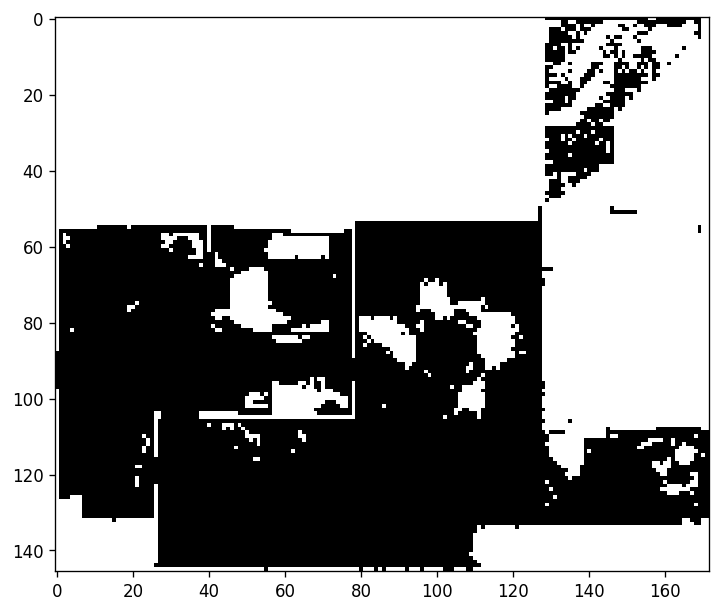

In [ ]:
obstacles = load_map(obstacles_save_path)
x_indices, y_indices = np.where(obstacles == 0)

xmin = np.min(x_indices)
xmax = np.max(x_indices)
ymin = np.min(y_indices)
ymax = np.max(y_indices)

print(np.unique(obstacles))
obstacles_pil = Image.fromarray(obstacles[xmin:xmax+1, ymin:ymax+1])
plt.figure(figsize=(8, 6), dpi=120)
plt.imshow(obstacles_pil, cmap='gray')
plt.show()

**It can be observed that the obstacles are white and the free space is black. You can also observe noisy black points lying on the ground. These points are caused by the slope or different floor heights in the scene.**

## Visualizing the Top-Down Color Map

This cell visualizes the **top-down color map** generated during VLMap construction.

The color map is created by projecting RGB observations from multiple viewpoints
onto a 2D ground-plane grid. For each grid cell, the color corresponding to the
closest visible surface is retained, producing a compact visual summary of the
environment layout.

The map is cropped using the same spatial bounds as the obstacle map to ensure
consistent alignment across all visualizations.

This representation provides:
- an intuitive overview of the environment structure,
- visual context for obstacle and semantic maps,
- and a reference for interpreting language-grounded landmarks in subsequent steps.

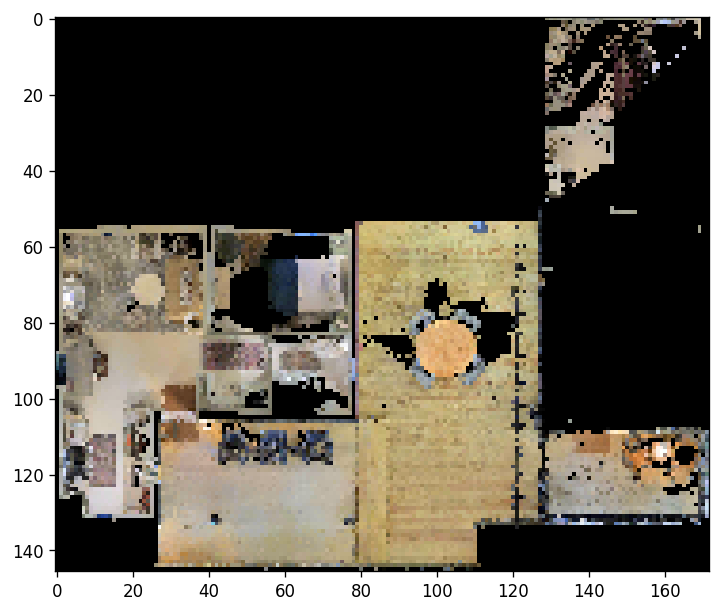

In [ ]:
color_top_down = load_map(color_top_down_save_path)
color_top_down = color_top_down[xmin:xmax+1, ymin:ymax+1]
color_top_down_pil = Image.fromarray(color_top_down)
plt.figure(figsize=(8, 6), dpi=120)
plt.imshow(color_top_down_pil)
plt.show()

**The color map is created by projecting the color-augmented point cloud to the floor.**

## Loading CLIP and Preparing the VLMap for Language Querying

This cell initializes the **CLIP vision–language model** and loads the
visual-language embedding grid generated during VLMap construction.

CLIP provides a shared embedding space for images and text, enabling semantic
comparison between natural language queries and spatial map representations.
The model is loaded in evaluation mode and moved to the appropriate compute
device.

The saved VLMap embedding grid is then loaded and spatially cropped using the
same bounds applied to the obstacle and color maps. This ensures consistent
alignment across all map representations.

At the end of this step, the notebook is ready to:
- encode natural language queries,
- compute semantic similarity against the VLMap,
- and identify language-grounded landmarks within the environment.

In [ ]:
%%capture
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_version = "ViT-B/32"
clip_feat_dim = {'RN50': 1024, 'RN101': 512, 'RN50x4': 640, 'RN50x16': 768,
                'RN50x64': 1024, 'ViT-B/32': 512, 'ViT-B/16': 512, 'ViT-L/14': 768}[clip_version]
clip_model, preprocess = clip.load(clip_version)  # clip.available_models()
clip_model.to(device).eval()

In [ ]:
grid = load_map(grid_save_path)
grid = grid[xmin:xmax+1, ymin:ymax+1]

**This uses the text form of all semantic categories provided by the Matterport3D dataset as prompts to the VLMap and localize all categories in the map. We filter out "floor" category.**

## Semantic Map Generation via Language Querying

This cell performs **open-vocabulary semantic labeling** over the constructed VLMap
using natural language queries.

The process consists of the following steps:

- **Text Embedding Generation**  
  A predefined set of semantic categories is encoded into the CLIP embedding space.
  These text embeddings represent language concepts that will be grounded onto the map.

- **Semantic Similarity Computation**  
  Each grid cell’s visual-language embedding is compared against all text embeddings
  using dot-product similarity. This produces a semantic score for every cell–label pair.

- **Label Assignment**  
  Each grid cell is assigned the label with the highest semantic similarity, resulting
  in a dense semantic segmentation of the environment.

- **Masking Non-Navigable Regions**  
  Cells corresponding to obstacles or floor regions are masked to improve interpretability
  and ensure that only valid semantic regions are visualized.

- **Visualization**  
  The resulting semantic map is rendered using a color palette, with a legend indicating
  the predicted semantic categories for each region.

This visualization represents the final **Visual Language Map**, demonstrating how
natural language concepts are grounded into a persistent spatial representation.

(146, 172)


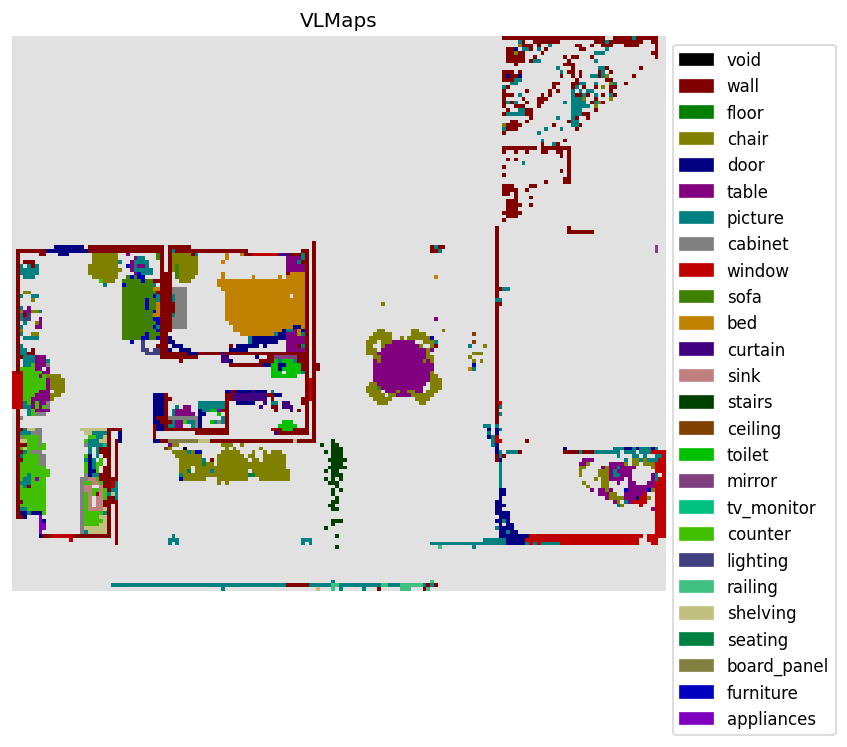

In [ ]:
no_map_mask = obstacles[xmin:xmax+1, ymin:ymax+1] > 0
obstacles_rgb = np.repeat(obstacles[xmin:xmax+1, ymin:ymax+1, None], 3, axis=2)
print(no_map_mask.shape)

lang = mp3dcat
text_feats = get_text_feats(lang, clip_model, clip_feat_dim)

map_feats = grid.reshape((-1, grid.shape[-1]))
scores_list = map_feats @ text_feats.T

predicts = np.argmax(scores_list, axis=1)
predicts = predicts.reshape((xmax - xmin + 1, ymax - ymin + 1))
floor_mask = predicts == 2

new_pallete = get_new_pallete(len(lang))
mask, patches = get_new_mask_pallete(predicts, new_pallete, out_label_flag=True, labels=lang)
seg = mask.convert("RGBA")
seg = np.array(seg)
seg[no_map_mask] = [225, 225, 225, 255]
seg[floor_mask] = [225, 225, 225, 255]
seg = Image.fromarray(seg)
plt.figure(figsize=(10, 6), dpi=120)
plt.legend(handles=patches, loc='upper left', bbox_to_anchor=(1., 1), prop={'size': 10})
plt.axis('off')
plt.title("VLMaps")
plt.imshow(seg)
plt.show()

## Open-Vocabulary Landmark Querying with Custom Language Prompts

This cell demonstrates **interactive, open-vocabulary querying** of the Visual Language
Map using a user-defined natural language prompt.

A list of object or region names is provided as a comma-separated string. Each term
is encoded into the shared CLIP embedding space and compared against the
visual-language embeddings stored in the VLMap.

For each grid cell:
- semantic similarity scores are computed against all query terms,
- the highest-scoring label is selected,
- and the resulting semantic assignment is visualized as a colored top-down map.

Non-navigable regions such as obstacles and floor areas are masked to improve
interpretability.

This step highlights a key capability of VLMaps:
**the ability to localize arbitrary, previously unseen language concepts directly
within a spatial map—without retraining or predefined object categories.**

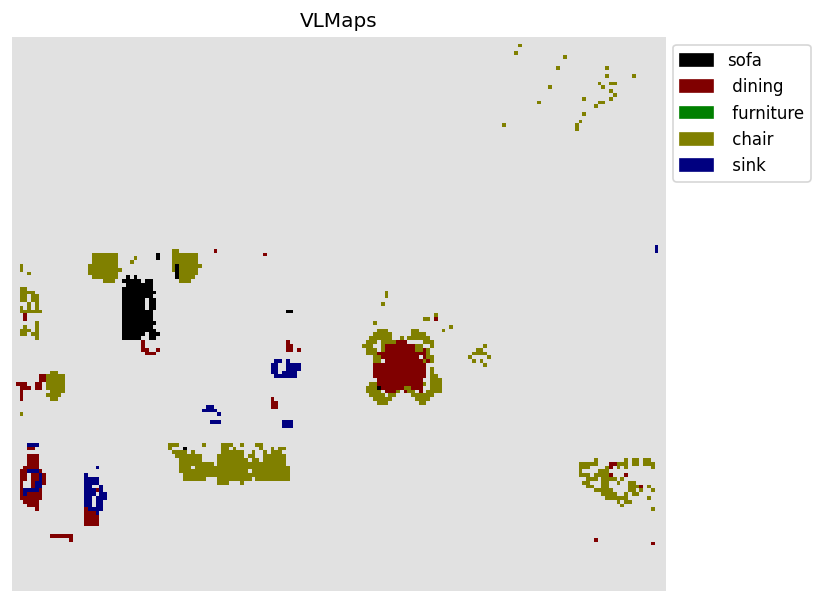

In [ ]:
# @markdown Input the prompt as a string of object names separated by ","
lang = "sofa, dining, furniture, chair, sink" # @param {type: "string"}
lang = lang.split(",")
text_feats = get_text_feats(lang, clip_model, clip_feat_dim)

map_feats = grid.reshape((-1, grid.shape[-1]))
scores_list = map_feats @ text_feats.T

predicts = np.argmax(scores_list, axis=1)
predicts = predicts.reshape((xmax - xmin + 1, ymax - ymin + 1))
floor_mask = predicts == 2

new_pallete = get_new_pallete(len(lang))
mask, patches = get_new_mask_pallete(predicts, new_pallete, out_label_flag=True, labels=lang)
seg = mask.convert("RGBA")
seg = np.array(seg)
seg[no_map_mask] = [225, 225, 225, 255]
seg[floor_mask] = [225, 225, 225, 255]
seg = Image.fromarray(seg)
plt.figure(figsize=(10, 6), dpi=120)
plt.legend(handles=patches, loc='upper left', bbox_to_anchor=(1., 1), prop={'size': 10})
plt.axis('off')
plt.title("VLMaps")
plt.imshow(seg)
plt.show()

## **Conclusion and Discussion**

This notebook presented a complete reimplementation of **Visual Language Maps (VLMaps)**
for language-conditioned robot navigation, demonstrating how visual–language embeddings
can be fused with spatial representations to enable open-vocabulary semantic reasoning.

Through the construction of a VLMap from RGB-D observations, the system successfully:
- integrated geometric structure with semantic understanding,
- produced persistent top-down representations of indoor environments,
- and enabled landmark identification using free-form natural language queries.

The results show that VLMaps allow a robot to localize and reason about objects such as
chairs, sofas, tables, and other household landmarks without relying on predefined object
categories or task-specific retraining. By operating in a shared vision–language embedding
space, the framework supports **zero-shot generalization**, allowing new concepts to be
introduced at inference time purely through language.

In addition, the generated obstacle maps and top-down color maps demonstrate how VLMaps
can support navigation planning by distinguishing free space from occupied regions while
retaining semantic context. This unified representation addresses a key limitation of
traditional SLAM-based systems, which lack the ability to interpret semantic relationships
and natural language instructions.

Overall, the findings confirm that fusing visual-language features with spatial maps provides
a robust foundation for intuitive and flexible robot navigation. While performance may be
affected by noise and clutter in complex environments, the approach highlights strong
potential for extension to multi-robot systems, different robot embodiments, and more
advanced language-driven planning pipelines.

This work demonstrates the effectiveness of VLMaps as a scalable framework for bridging
semantic understanding and spatial reasoning, and reinforces their applicability as a core
building block for future research in language-guided robotic navigation.

## Credits and Contributions

This project was completed as a collaborative effort. Contributions were divided as follows:

> **Aman Chandak**

> **Ayushman Mishra**

Both contributors collaborated on validating results and ensuring alignment with the original
*Visual Language Maps for Robot Navigation* paper.

Repository Link: **https://github.com/aymisxx/vlmaps-reimplementation**